<a href="https://colab.research.google.com/github/Tiffany0410/JSC270_Assg2/blob/main/JSC270_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Importing data

In [4]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

# Initial data exploration

**Q1)**

In [5]:
# Q1: Checking data types
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Q1: Check the columns of your data. Are they the expected data types based on their descriptions in ​this text file description of the data​?**

A: Using income94.info(), we can see that the columns _age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week_ are int64 type, however, in the text file description, they are stated as continuous data type.

**Q2)**

In [6]:
# Q2: Replacing missing values
income94.value_counts()
income94 = income94.replace(" ?", np.nan)

In [7]:
# Count the number of missing values
income94.isnull().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

**Q2: How are missing values represented in this data? Cast any misspecified variables to a different data type or assert that they are and set missing characters to np.nan. Count the number of missing values in each column.**

A: The missing values are represented as "?" in this data. There are 1836 missing data for colume _workclass_, 1843 missing data for _occupation_ and 583 missing data for _native_country_. Other columns have 0 missing data.

**Q3)**

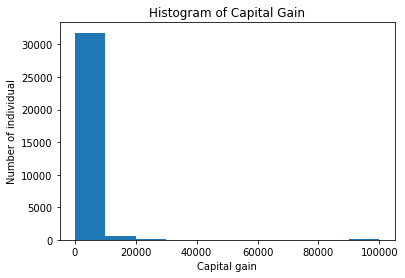

In [8]:
# Q3: Distribution of capital_gain
plt.hist(income94.capital_gain)
plt.title('Histogram of Capital Gain')
plt.xlabel('Capital gain')
plt.ylabel('Number of individual')
plt.show()

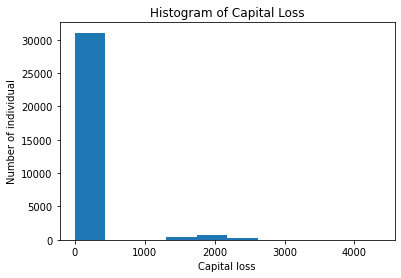

In [9]:
# Q3: Distribution of capital_loss
plt.hist(income94.capital_loss)
plt.title('Histogram of Capital Loss')
plt.xlabel('Capital loss')
plt.ylabel('Number of individual')
plt.show()

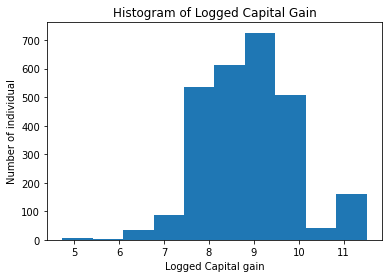

In [10]:
# Logged capital gain
gain = income94[income94.capital_gain > 0]
plt.hist(np.log(gain.capital_gain))
plt.title('Histogram of Logged Capital Gain')
plt.xlabel('Logged Capital gain')
plt.ylabel('Number of individual')
plt.show()

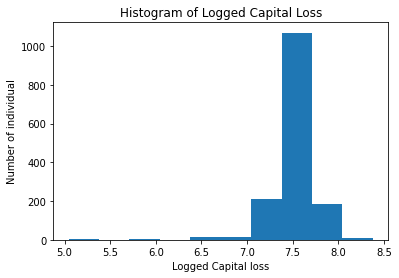

In [11]:
# Logged capital loss
loss = income94[income94.capital_loss > 0]
plt.hist(np.log(loss.capital_loss))
plt.title('Histogram of Logged Capital Loss')
plt.xlabel('Logged Capital loss')
plt.ylabel('Number of individual')
plt.show()

**Q3: Individually plot the distributions of ​capital_gain​ and ​capital_loss​. Should these variables be transformed? Why/why not? If yes, create a new variable for either that should be transformed and plot or describe in a table the distribution of the new categorical variable.**

A: These variables should be transformed into log capital gain/loss since a log-transformation would remove or reduce the skewness of the data and provides better interpretation. Also, there is a huge number of zeros, which makes the graph heavily right-skewed and could not perform log-transformation on the zeros, therefore, I decided to remove all zeros and perform log-transformation on the remaining data.

**Q4)**

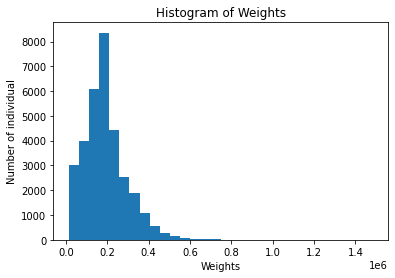

In [12]:
# Q4: Exploring weight
plt.hist(income94.fnlwgt, bins = 30)
plt.title('Histogram of Weights')
plt.xlabel('Weights')
plt.ylabel('Number of individual')
plt.show()

In [13]:
# Find mean and median
info = [income94.fnlwgt.mean(), income94.fnlwgt.median()]
info

[189778.36651208502, 178356.0]

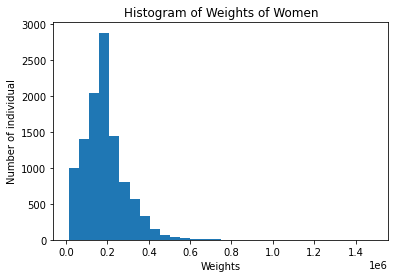

[185746.31120601617, 176077.0]

In [14]:
# weights for women
income94.head()
women = income94[income94.sex==' Female']
plt.hist(women.fnlwgt, bins = 30)
plt.title('Histogram of Weights of Women')
plt.xlabel('Weights')
plt.ylabel('Number of individual')
plt.show()
info = [women.fnlwgt.mean(), women.fnlwgt.median()]
info

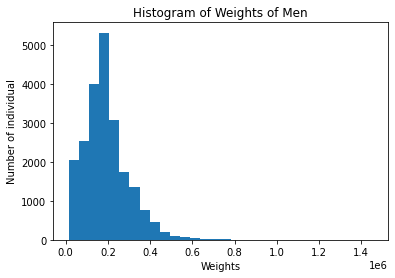

[191771.44901330885, 180140.0]

In [15]:
# weights for men
income94.head()
men = income94[income94.sex==' Male']
plt.hist(men.fnlwgt, bins = 30)
plt.title('Histogram of Weights of Men')
plt.xlabel('Weights')
plt.ylabel('Number of individual')
plt.show()
info = [men.fnlwgt.mean(), men.fnlwgt.median()]
info

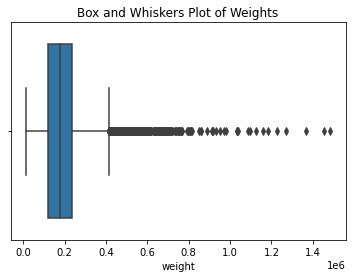

In [16]:
# Identify Outliers
sns.boxplot(x = 'fnlwgt', data = income94)
plt.xlabel('weight')
plt.title('Box and Whiskers Plot of Weights')
plt.show()

In [17]:
# Set extreme outliers in the range of 1200000-1400000 to missing
income94 = income94.replace(income94.fnlwgt<1200000, np.nan)

**Q4: This data is census data and therefore used to estimate finite population means using sampling. The weights here indicate the share of the population that sample represents based on location and, sometimes, other factors. You can read more about the weights in the paper linked in ​this text file description of the data​. Plot or numerically explore the distribution of fnlwgt. Is this data symmetrically distributed? Compare the distribution of this variable between men and women and comment on any trends you notice. Should outliers be excluded? If you think yes, set the fnlwgt values for those you deem to be outliers as missing for the remainder of your analyses.**

A: From the plot and numerical information, it suggests that the distribution of data is skewed to the right since the median is less than the mean. The mean and median weights for men are slightly higher than women's, however, the mode are the same for both men and women suggested by the plot. From the box and whiskers plot, it shows that the outliers are data that have weight larger than 400000, but I think we should include the outliers that are in the range of 400000-1000000 since there are many outliers cluster around that range which may suggest that the data are usual. On the other hand, I think we should exclude the extreme outliers that are in the range of 1200000-1400000 since they are unusual values in the dataset, and they might distort statistical analyses.

# Correlation

In [32]:
# Find the correlations between age, education_num, and hours_per_week
corr = income94[['age', 'education_num', 'hours_per_week']].corr()
corr

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


**a) Do any of the variables appear to be correlated?**

A: From the correlation table, we see that variance in *age* explains around 3.65% of variance in *education_num*, variance in *age* explains around 6.88% of variance in *hours_per_week*, and variance in *education_num* explains around 14.81% of variance in *hours_per_week*.
Therefore, variables *education_num* and *hours_per_week* appear to be more correlated.

In [40]:
reg = smf.ols('education_num ~ hours_per_week', data = income94).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          education_num   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     730.4
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          4.24e-159
Time:                        23:42:54   Log-Likelihood:                -76609.
No. Observations:               32561   AIC:                         1.532e+05
Df Residuals:                   32559   BIC:                         1.532e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.8327      0.048    182.

**b) Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result. Is the direction and significance of your finding as expected?**

A: From the summary, it suggests that correlation between *hours_per_week* and *education_num* is significant since P>|t| = 0. It also tells us that as *hours_per_week* increases, *education_num* increases by 0.0309. Therefore, it's positively correlated and statistically significant as expected since we tend to think people who are more educated work more or have a higher chance to work overtime.

In [49]:
# Male education_num and age
men = income94[income94.sex==' Male']
corr = men[['age', 'education_num']].corr()
reg = smf.ols('age ~ education_num', data = men).fit()
print(corr)
print(reg.summary())

                    age  education_num
age            1.000000       0.060486
education_num  0.060486       1.000000
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     80.01
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           4.02e-19
Time:                        23:55:15   Log-Likelihood:                -87381.
No. Observations:               21790   AIC:                         1.748e+05
Df Residuals:                   21788   BIC:                         1.748e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [48]:
# Female education_num and age
female = income94[income94.sex==' Female']
corr = female[['age', 'education_num']].corr()
reg = smf.ols('age ~ education_num', data = female).fit()
print(corr)
print(reg.summary())

                    age  education_num
age            1.000000      -0.017899
education_num -0.017899       1.000000
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.451
Date:                Sun, 07 Feb 2021   Prob (F-statistic):             0.0632
Time:                        23:55:05   Log-Likelihood:                -43717.
No. Observations:               10771   AIC:                         8.744e+04
Df Residuals:                   10769   BIC:                         8.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------

**c) How does the correlation (and its significance) between education_num and age compare between male and female participants? Is this expected?**

A: The correlation between *education_num* and *age* for male is 0.060486, positively correlated and statistically significant, however, the correlation for female is -0.017899, which is negatively correlated and not statistically significant. This is different from what I expected since I thought the correlation between education_num and age compare between male and female participants would be both positively correlated. 

In [78]:
# Divided by the average weights since dividing by sum would make the covariance too small
income94['weighted_hours'] = (income94.hours_per_week * income94.fnlwgt)/(income94.fnlwgt.mean())
income94['weighted_education'] = (income94.education_num * income94.fnlwgt)/(income94.fnlwgt.mean())

weighted_cov = income94[['weighted_hours', 'weighted_education']].cov()
cov = income94[['hours_per_week', 'education_num']].cov()
print("The unweighted covariance:")
print(cov)
print("\nThe weighted covariance:")
print(weighted_cov)

The unweighted covariance:
                hours_per_week  education_num
hours_per_week      152.458995       4.705338
education_num         4.705338       6.618890

The weighted covariance:
                    weighted_hours  weighted_education
weighted_hours          680.428037          126.580571
weighted_education      126.580571           38.601177


**d) Compare the weighted vs unweighted variance and covariance between
education_num and hourse_per_week. What do the changes in these values tell us about the weights in our data and who may be over/under represented?**

A: From the above statistics, we see that the weighted variance and covariance between *education_num* and *hours_per_week* are both much higher than the unweighted variance and covariance. The weighted variance indicates that the variables are farther from the mean and the weighted covariance suggests that there is a stronger relationship between the variables. This implies that in this data, the smaller values with smaller weights are under-represented and larger values with larger weights are over-represented since the weights on the samples with smaller values are smaller and the weights on the samples with larger values are larger.

# Regression

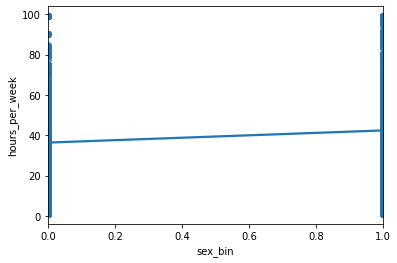

In [89]:
# Linear regression with hours_per_week as the dependent variable and sex as the independent variable
# Use binary: set male to 1 and female to 0
income94['sex_bin'] = (income94.sex == " Male").astype(int)
sns.regplot(x='sex_bin', y='hours_per_week', data=income94)

In [91]:
reg = smf.ols('hours_per_week ~ sex_bin', data = income94).fit()
print(corr)
print(reg.summary())

                    weighted_hours  weighted_education
weighted_hours            1.000000            0.781044
weighted_education        0.781044            1.000000
                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        03:32:36   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t  

**a) Do men tend to work more hours?**

A: Yes, it suggested by the plot and los summary: women tend to work 36.344 hours per week, where men tend to work 42.510 hours per week, which men tend to work 6.02 more hours.

In [92]:
# Add control variable
reg = smf.ols('hours_per_week ~ sex_bin + education_num', data = income94).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        03:33:26   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

**b) Add education_num as a control variable, does the trend in hours worked by men vs women remain the same? Is education_num significant?**

A: After adding education_num as a control variable, the trend in hours worked by men vs. women remain the same, but the number of hours worked by women is decreased to 29.41 hours per week, and the number of hours worked by men is decreased to 35.38 hours per week. Lastly, education_num is statistically significant. 

In [97]:
# add gross_income_group as a binary variable
# income <=50K as 0 and >50K as 1
income94['income_bin'] = (income94.gross_income_group == " >50K").astype(int)
reg = smf.ols('hours_per_week ~ sex_bin + education_num + income_bin', data = income94).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:04:58   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        31.4218      0.288    109.184

**c) Now add gross_income_group as a binary variable in the model and compare the model with these 3 variables vs the models with 2 and 1 variable. What statistic would you choose to decide which model is the best? Describe how you could re-do what was just done using a model fitting procedure.**

A: To decide which model is the best, I would choose to look at the R-squared value since it signifies the percentage variation in dependent that is explained by independent variables. Here, 5.3%, 7.4% and 9.4% variation in dependent are explained by 1, 2 and 3 independent variables respectively. 

I could re-do using a model fitting procedure by applying forward-selection regression. First, I would start with an empty model, add in variables one-by-one and add the one variable that gives the best improvement to the model. In other words, in each step, I would add in one variable that has the highest R-squared value.